# HOUSING PRICE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("house_price.csv")

In [4]:
df.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [5]:
df.tail()

,area,rooms,price
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


In [7]:
df.shape

(47, 3)

In [8]:
df.isna().sum()

area     0
rooms    0
price    0
dtype: int64

In [9]:
df.describe()

,area,rooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


# 2.Simple linear regression

# Assign x to input features & assign y to response features

In [30]:
x = df.iloc[:, :1].values
y = df.iloc[:, -1:].values

# Scatter plot

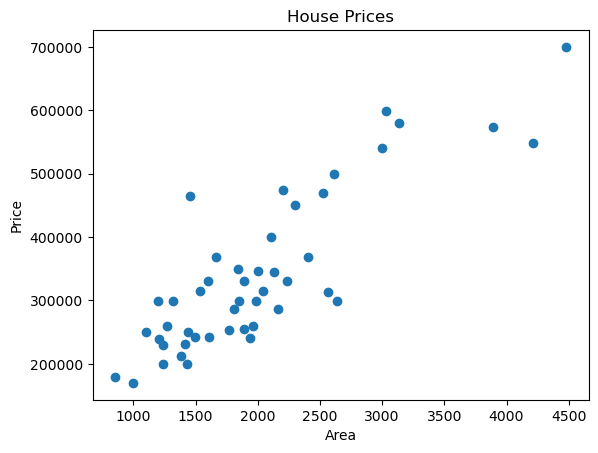

In [37]:
#visualize the dataset

plt.scatter(x,y)
plt.title("House Prices")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [35]:
x.shape

(47, 1)

In [36]:
y.shape

(47, 1)

# split the data for training and testing

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

# 3.Build a simple linear regression model

In [34]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [38]:
ypred = lin_reg.predict(x_test)
ypred

array([[335111.83671602],
       [325161.11687151],
       [418725.52429836],
       [246384.58476914],
       [262554.50451647],
       [229800.05169495],
       [319909.34806468],
       [682834.21350472],
       [239197.95377032],
       [354736.86752047]])

In [43]:
y_test

array([[259900],
       [329999],
       [314000],
       [299900],
       [249900],
       [299000],
       [299900],
       [699900],
       [259900],
       [399900]], dtype=int64)

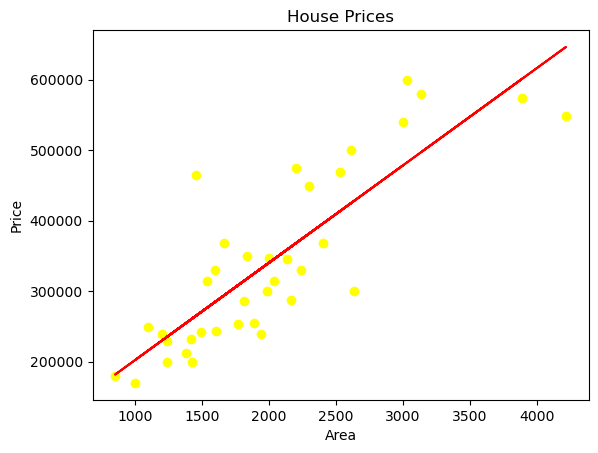

In [50]:
#visualize the dataset

plt.scatter(x_train,y_train,color='yellow')
plt.plot(x_train, lin_reg.predict(x_train),color='red')
plt.title("House Prices")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Calculate R square

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print("Mean Squared Error: \t", mean_squared_error(y_test,ypred))
print()
print("RMSE:\t", np.sqrt(mean_squared_error(y_test, ypred)))
print()
print("Variance Score:\t",explained_variance_score (y_test,ypred))
# Coeficient of determination R_square
print()
print("R-Square: \t",r2_score (y_test,ypred))

Mean Squared Error: 	 2762022826.4372683

RMSE:	 52554.950541668935

Variance Score:	 0.8270780445446254

R-Square: 	 0.8270752386436113


# Testing unseen data

In [47]:
unseen_pred = lin_reg.predict([[2200]])
unseen_pred

array([[368004.49397981]])

In [48]:
unseen_pred2 = lin_reg.predict([[5000]])
unseen_pred2

array([[754976.93237742]])

# saving the trained model:
    1.pickle file conversion

In [51]:
import pickle

with open('model_pk', 'wb') as file:
    pickle.dump(lin_reg, file)

In [52]:
with open('model_pk', 'rb') as f:
    deploy_lr=pickle.load(f)

In [53]:
deploy_lr.predict([[4500]])

array([[685874.71123499]])

# 3.multilinear regression

# Assign x to input features & assign y to response features

In [75]:
c=df.iloc[:,:-1]
c.head()

,area,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [77]:
d=df.iloc[:,-1:]
d.head()

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [55]:
a = df.iloc[:, :-1].values
b = df.iloc[:, -1].values

# Scatter plot Rooms vs price

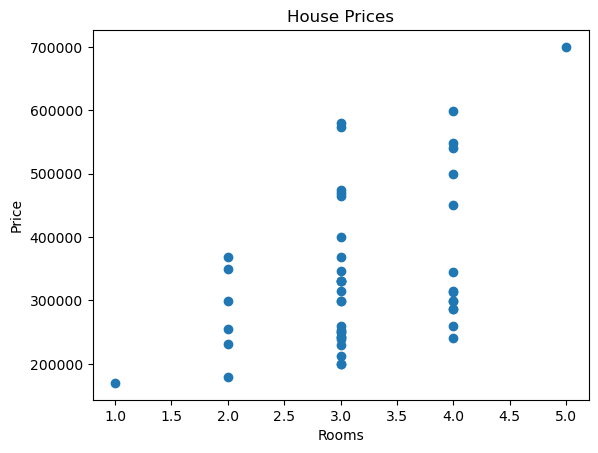

In [87]:
#scatter plot
plt.scatter(c["rooms"],d)
plt.title("House Prices")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

# training and testing the dataset

In [56]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 2)

In [65]:
a_train

array([[2400,    3],
       [1494,    3],
       [1236,    3],
       [1839,    2],
       [1100,    3],
       [ 852,    2],
       [2637,    3],
       [2526,    3],
       [1600,    3],
       [3890,    3],
       [3137,    3],
       [4215,    4],
       [3031,    4],
       [1239,    3],
       [1940,    4],
       [3000,    4],
       [1534,    3],
       [1416,    2],
       [2162,    4],
       [1985,    4],
       [2040,    4],
       [2200,    3],
       [1767,    3],
       [1458,    3],
       [2132,    4],
       [1888,    2],
       [2238,    3],
       [1000,    1],
       [1811,    4],
       [1427,    3],
       [1203,    3],
       [2000,    3],
       [2609,    4],
       [1604,    3],
       [1380,    3],
       [2300,    4],
       [1664,    2]], dtype=int64)

In [69]:
b_train

array([369000, 242500, 199900, 349900, 249900, 179900, 299900, 469000,
       329900, 573900, 579900, 549000, 599000, 229900, 239999, 539900,
       314900, 232000, 287000, 299900, 314900, 475000, 252900, 464500,
       345000, 255000, 329900, 169900, 285900, 198999, 239500, 347000,
       499998, 242900, 212000, 449900, 368500], dtype=int64)

# 4. build a multi linear model

In [57]:
mul_reg = LinearRegression()
mul_reg.fit(a_train, b_train)

LinearRegression()

In [58]:
bpred = mul_reg.predict(a_test)
bpred

array([335224.80438301, 325153.96470802, 418803.53778707, 246286.08497481,
       262573.52465506, 229832.76462736, 320028.67103682, 682926.09767704,
       239226.73796864, 354717.3513997 ])

In [59]:
b_test

array([259900, 329999, 314000, 299900, 249900, 299000, 299900, 699900,
       259900, 399900], dtype=int64)

# calculate R square

In [83]:
print("Mean Squared Error: \t", mean_squared_error(b_test,bpred))
print()
print("RMSE:\t", np.sqrt(mean_squared_error(b_test, bpred)))
print()
print("Variance Score:\t",explained_variance_score (b_test,bpred))
# Coeficient of determination R_square
print()
print("R-Square: \t",r2_score (b_test,bpred))

Mean Squared Error: 	 2766239087.094458

RMSE:	 52595.04812332106

Variance Score:	 0.8268151006452942

R-Square: 	 0.826811266941067


# Testing unseen data

In [89]:
unseen_pred = mul_reg.predict([[2200, 3]])
unseen_pred

array([367979.43141092])

In [86]:
unseen_pred2 = mul_reg.predict([[3200,3]])
unseen_pred2

array([506126.09819448])

In [93]:
unseen_pred3 = mul_reg.predict([[4200,4]])
unseen_pred3

array([644397.04464463])

# Saving the model:
    2.joblib

In [94]:
import joblib
joblib.dump(mul_reg,'model_jlib')

['model_jlib']

In [95]:
jl_deploy_lr=joblib.load('model_jlib')

In [96]:
jl_deploy_lr.predict([[4200,5]])

array([644521.32431121])